# Imports and constants

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [101]:
# original dataset made public to make this ipynb universal
DATASET_WITH_ATTRIBUTES_SHARE_URL = 'https://drive.google.com/file/d/14zVRGt9Pw2ificZ5KXqYIg--iBQsn-F9/view?usp=sharing'
DATASET_WITH_ATTRIBUTES_PATH = 'https://drive.google.com/uc?id=' + DATASET_WITH_ATTRIBUTES_SHARE_URL.split('/')[-2]
MIN_OCCS_TO_ANALYZE = 10

In [102]:
pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None

# Dataset preparation

Let's import dataset made in the previous notebook. It contains all the attributes of events in the form of columns

In [103]:
df = pd.read_csv(DATASET_WITH_ATTRIBUTES_PATH, index_col='Unnamed: 0')
df = df.drop(['event_attributes'], axis=1)
df.head()

,userid,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,Add Vehicle Success_make,Add Vehicle Success_model,Add Vehicle Success_color,...,Order_premium membership,Sign Up Error_method,Sign Up Error_description,Calculator Used_google map installed,Calculator Used_selected route type,Subscription Premium Renew_start date,Subscription Premium Renew_renewal date,Subscription Premium Renew_membership type,Add Vehicle Failed_error code,Add Vehicle Failed_error message
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,2022-01-16 17:03:04,android,samsung,SM-N975U,Dodge,Caravan,White,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,2022-01-16 17:07:47,android,samsung,SM-N975U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,2022-01-16 17:16:25,android,samsung,SM-G973U1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,2022-01-16 17:24:22,android,samsung,SM-N975U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,2022-01-16 17:34:51,ios,Apple,"iPhone12,1",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's keep only events related to users who are definetely premium users. It makes sence, because it's unnatural to predict churn of people who can't churn

In [104]:
premium_events = df[(df['event_name'] == 'Subscription Premium Cancel') |
                    (df['event_name'] == 'Subscription Premium') |
                    (df['event_name'] == 'Subscription Premium Renew')]
premium_users = premium_events['userid'].unique()
df_premium = df.loc[df['userid'].isin(premium_users)].sort_values('event_created_date', ascending=True).copy().reset_index(drop=True)
df_premium.head()

,userid,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,Add Vehicle Success_make,Add Vehicle Success_model,Add Vehicle Success_color,...,Order_premium membership,Sign Up Error_method,Sign Up Error_description,Calculator Used_google map installed,Calculator Used_selected route type,Subscription Premium Renew_start date,Subscription Premium Renew_renewal date,Subscription Premium Renew_membership type,Add Vehicle Failed_error code,Add Vehicle Failed_error message
0,c8d4d395f6b45f1ddd6ab9f29180f54a,TX,Account History Transaction Details,2022-01-15 03:54:04,ios,Apple,"iPhone14,3",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66d1fab17f5b7bcf9e43ae0438a2a6cf,IL,Order,2022-01-15 11:17:12,outofband,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66d1fab17f5b7bcf9e43ae0438a2a6cf,IL,Order,2022-01-15 11:17:12,outofband,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66d1fab17f5b7bcf9e43ae0438a2a6cf,IL,Order,2022-01-15 11:17:12,outofband,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66d1fab17f5b7bcf9e43ae0438a2a6cf,IL,Order,2022-01-15 11:17:12,outofband,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also let's create dataset with only cancelation event

In [105]:
df_canceled = df_premium[df_premium['event_name'] == 'Subscription Premium Cancel']
df_canceled.head()

,userid,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,Add Vehicle Success_make,Add Vehicle Success_model,Add Vehicle Success_color,...,Order_premium membership,Sign Up Error_method,Sign Up Error_description,Calculator Used_google map installed,Calculator Used_selected route type,Subscription Premium Renew_start date,Subscription Premium Renew_renewal date,Subscription Premium Renew_membership type,Add Vehicle Failed_error code,Add Vehicle Failed_error message
110,430d96d025d9c30dbd62aa4fd3591e98,CA,Subscription Premium Cancel,2022-01-17 23:30:54,outofband,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,1e50975ba98d210cf2d141ec0b7397c1,FL,Subscription Premium Cancel,2022-01-19 12:52:29,outofband,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,e18067187b24f5925c57486e23ff5abf,VA,Subscription Premium Cancel,2022-01-19 22:42:24,outofband,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,c54556dbb037662501bf2f938e6c9fd4,DE,Subscription Premium Cancel,2022-01-19 22:42:25,outofband,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,385f820f77b8a4ac405178faf27cda22,CA,Subscription Premium Cancel,2022-01-19 23:29:26,outofband,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Also let`s create resulting dataframe. We will be adding info to it during all the notebook.

In [106]:
all_events = df_premium['event_name'].unique()
df_multiindex = pd.DataFrame(data={'event_name': all_events, 'attribute_name':['']*len(all_events), 'attribute_value':['']*len(all_events)}
)
df_res = pd.DataFrame(data={'occs_cancel': 0, 'all_occs': 0}, index=pd.MultiIndex.from_frame(df_multiindex))
df_res = df_res.sort_index()

# Events correlation

We should somehow consider, that actions which are closer to subscription cancel, are better related with it, than those made a lot steps ago.
For this purpose we will use score field. Score will be bigger, if events are closer to subscription cancel. If event is one step before premium cancel, it's score is increased by 1; if two steps away, by 1/2; if 3, by 1/3 and so on. 

But also we should consider general frequency of event before subscription cancel, and event score divided by count of events before premium cancel. The first one means, that people who close their subscription make some kinds of events more often or less in general. The second means, that they perform some kind of events closely to the moment of subscription cancel. To consider both, we will use F1 score.

In [107]:
# Get all unique events
all_events = df_premium['event_name'].unique()
# Create resulting dataframe
df_scored_events = pd.DataFrame(data={'score': np.zeros_like(all_events), 
                                      'occs_before_cancel': np.zeros_like(all_events)}, index=all_events)
# Calculate event scores and count of occurences before premium cancel in general
for info in df_canceled.iterrows():
    uuid = info[1]['userid']
    id = info[0]
    prev_actions = df_premium.loc[:id - 1]
    prev_actions = prev_actions[prev_actions['userid'] == uuid]
    prev_actions_names = prev_actions.loc[:, 'event_name']
    for i, action in enumerate(reversed(prev_actions_names.values)):
        df_scored_events.loc[action, 'score'] += 1/(i+1)
        df_scored_events.loc[action, 'occs_before_cancel'] += 1
        # Filling result dataset
        df_res.loc[(action, '', ''), 'occs_cancel'] += 1
# Adding general event occurences
df_scored_events = df_scored_events.merge(df_premium['event_name'].value_counts(), right_index=True, left_index=True)
df_scored_events = df_scored_events.rename(columns={"event_name": "all_occs"})
# Filling result dataset
for event, count in df_premium['event_name'].value_counts().items():
    df_res.loc[(event, '', ''), 'all_occs'] = count
# Deleting events with occurences less then bound MIN_OCCS_TO_ANALYZE
df_scored_events = df_scored_events.drop(df_scored_events[df_scored_events['all_occs'] < MIN_OCCS_TO_ANALYZE].index)
# Fixing potential division by zero
df_scored_events.loc[df_scored_events['occs_before_cancel'] == 0, 'occs_before_cancel'] = 1e-6
# Calculating relational measures
df_scored_events['score/occs_before_cancel'] = df_scored_events['score'] / df_scored_events['occs_before_cancel']
df_scored_events['occs_before_cancel/all_occs'] = df_scored_events['occs_before_cancel'] / df_scored_events['all_occs']
# Calculating F1 score
df_scored_events['f1'] = 2 * df_scored_events['score/occs_before_cancel'] * df_scored_events['occs_before_cancel/all_occs'] /\
                                (df_scored_events['score/occs_before_cancel'] + df_scored_events['occs_before_cancel/all_occs'])
# Visualizing dataframe with sorting by f1 score
df_scored_events.sort_values('f1', ascending=False)

,score,occs_before_cancel,all_occs,score/occs_before_cancel,occs_before_cancel/all_occs,f1
Chat Conversation Started,189.699107,552,905,0.343658,0.609945,0.439622
Chat Conversation Opened,161.25621,581,1116,0.277549,0.520609,0.36207
Wallet Opened,134.527435,445,1165,0.302309,0.381974,0.337504
Transaction Refund,17.833333,19,100,0.938596,0.19,0.316027
Calculator View,20.615826,127,380,0.162329,0.334211,0.218521
Account History Transaction Details,73.571003,476,1447,0.154561,0.328956,0.210308
Account Setup Profile Skip,7.449016,58,111,0.128431,0.522523,0.206184
Subscription Premium,35.181996,241,711,0.145983,0.338959,0.204075
Sign Out,20.126662,44,356,0.457424,0.123596,0.194608
Add Payment Method Success,35.751964,267,780,0.133902,0.342308,0.192503


How to interpret this table:

Chat conversation started have score 199.4 and occures 551 times before cancel (so score/occs_before_cancel is 0.36). That means that people who cancel the subscription often contact the support before this. Chat conversation started occures 905 times, so occs_before_cancel/occs is 0.6. So, more then half of support contacts is by people who then cancels the subscription.

In the case of an Order event, we can see it's negative correlation with subscription cancel. 0.33 of all premium users cancel their subscription, but only 0.09 of those who order taxies are those who plan to cancel subscription. Also they do this expectedly 10 events before their subscription cancel.

# Event attributes correlation

We will use special function to analyze function atributes influence on the subscription cancellation. Some of them logicaly shouldn't influence the event if are made long time ago. Others are analogous to user attributes, characterize him, so we shouldn't calculate score for them. Therefore we will use occs_before_cancel/all_occs only.

## Function to create tables for comparision

In [108]:
def table_comparision(attribute_analyze, calc_score=False, add_to_res=True):
    # Defining name of corresponding event
    if '_' not in attribute_analyze:
        raise Exception('attribute should have one "_"')
    event_analyze = attribute_analyze.split('_')[0]
    # Getting and plotting attributes value frequency
    value_freq = df_premium[attribute_analyze].value_counts()
    value_freq.plot(kind='bar', title=f'{attribute_analyze} values count')
    plt.show()
    # Defining boundary for adding key to "Other" category
    value_freq_min = max(len(df_premium[df_premium['event_name'] == event_analyze]) / 100, MIN_OCCS_TO_ANALYZE)
    # Defining attributes values
    valid_keys = list(value_freq[value_freq >= value_freq_min].keys())
    if len(value_freq[value_freq >= value_freq_min]) < len(value_freq):
        valid_keys += ["Other"]
    # Creating dataframe
    if calc_score:
        df_scored_atts = pd.DataFrame(data={'score': 0, 
                                      'occs_before_cancel': 0, 'all_occs': 0}, index=valid_keys)
    else:
        df_scored_atts = pd.DataFrame(data={'occs_before_cancel': 0, 'all_occs': 0}, index=valid_keys)
    # Creating new result dataframe part if needed
    if add_to_res:
        attribute_analyze_small = attribute_analyze.split('_')[1]
        df_multiindex_part = pd.DataFrame(data={'event_name': [event_analyze]*len(valid_keys), 
                                                'attribute_name':[attribute_analyze_small]*len(valid_keys), 
                                                'attribute_value':valid_keys})
        df_res_part = pd.DataFrame(data={'occs_cancel': 0, 'all_occs': 0}, index=pd.MultiIndex.from_frame(df_multiindex_part))
        df_res_part = df_res_part.sort_index()
    # Counting the score and occs before cancel
    for info in df_canceled.iterrows():
        uuid = info[1]['userid']
        id = info[0]
        prev_actions = df_premium.loc[:id - 1]
        prev_actions = prev_actions[prev_actions['userid'] == uuid]
        prev_actions_names = prev_actions.loc[:, 'event_name']
        for i, action in enumerate(reversed(prev_actions_names.values)):
            if action == event_analyze:
                attribute_val = prev_actions.iloc[-i-1][attribute_analyze]
                if pd.notna(attribute_val):
                    if attribute_val not in valid_keys:
                        attribute_val = "Other"
                    if calc_score:
                        df_scored_atts.loc[attribute_val, 'score'] += 1/(i+1)
                    df_scored_atts.loc[attribute_val, 'occs_before_cancel'] += 1
                    # Filling res dataframe
                    if add_to_res:
                        df_res_part.loc[(event_analyze, attribute_analyze_small, attribute_val), 'occs_cancel'] += 1
                        
    # Counting all occurences
    for attribute_val in df_scored_atts.index:
        if attribute_val != "Other":
            selected_attribute_events = df_premium[df_premium[attribute_analyze] == attribute_val]
        else:
            selected_attribute_events = df_premium[(~df_premium[attribute_analyze].isin(valid_keys)) & (~df_premium[attribute_analyze].isna())]
        df_scored_atts.loc[attribute_val, 'all_occs'] = selected_attribute_events[attribute_analyze].count()
        # Filling res dataframe
        if add_to_res:
            df_res_part.loc[(event_analyze, attribute_analyze_small, attribute_val), 'all_occs'] = selected_attribute_events[attribute_analyze].count()

    # Adding res part dataframe to res
    if add_to_res:
        global df_res
        df_res = pd.concat([df_res, df_res_part])
        df_res = df_res.sort_index()
    # Deleting events with occurences less then bound MIN_OCCS_TO_ANALYZE
    df_scored_atts = df_scored_atts.drop(df_scored_atts[df_scored_atts['all_occs'] < MIN_OCCS_TO_ANALYZE].index)
    # Fixing potential division by zero
    df_scored_atts.loc[df_scored_atts['occs_before_cancel'] == 0, 'occs_before_cancel'] = 1e-6
    # Calculating relational measures
    if calc_score:
        df_scored_atts['score/occs_before_cancel'] = df_scored_atts['score'] / df_scored_atts['occs_before_cancel']
    df_scored_atts['occs_before_cancel/all_occs'] = df_scored_atts['occs_before_cancel'] / df_scored_atts['all_occs']
    # Calculating F1 score
    if calc_score:
        df_scored_atts['f1'] = 2 * df_scored_atts['score/occs_before_cancel'] * df_scored_atts['occs_before_cancel/all_occs'] /\
                                (df_scored_atts['score/occs_before_cancel'] + df_scored_atts['occs_before_cancel/all_occs'])
    return df_scored_atts

## Function usage

We have shown only those attributes that have significant difference in their metrics with event in general and have enough samples to believe it is statistically accurate to derive insights.

In the first table we can see, that Jeep, Kia and Chrysler owners (or lessees) tend to cancel their subscription much more then Lexus or BMW

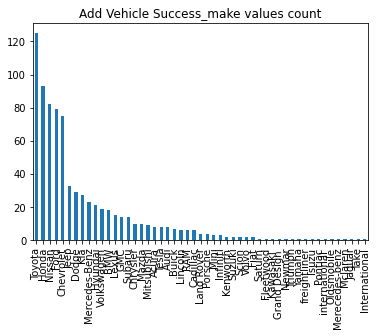

,occs_before_cancel,all_occs,occs_before_cancel/all_occs
Jeep,14.0,33,0.424242
Kia,11.0,27,0.407407
Chrysler,4.0,10,0.400000
Honda,35.0,93,0.376344
Subaru,5.0,14,0.357143
Ford,28.0,79,0.354430
Dodge,10.0,29,0.344828
Hyundai,7.0,21,0.333333
Chevrolet,24.0,75,0.320000
Nissan,26.0,82,0.317073


In [109]:
table_comparision('Add Vehicle Success_make').sort_values('occs_before_cancel/all_occs', ascending=False)

Here we can see, that Beige, Gold, Orange and Yellow cars owners cancel their subscription more often than anyone else. But it is close to statistical error.

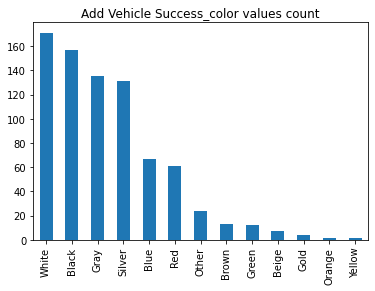

,occs_before_cancel,all_occs,occs_before_cancel/all_occs
Other,11.0,15,0.733333
Other,11.0,15,0.733333
Black,53.0,157,0.337580
Blue,22.0,67,0.328358
Red,20.0,61,0.327869
Silver,42.0,131,0.320611
White,54.0,171,0.315789
Gray,41.0,135,0.303704
Brown,3.0,13,0.230769
Green,2.0,12,0.166667


In [110]:
table_comparision('Add Vehicle Success_color').sort_values('occs_before_cancel/all_occs', ascending=False)

In the next case, we can see that those who add their cars temporary, cancel their subscription more often.

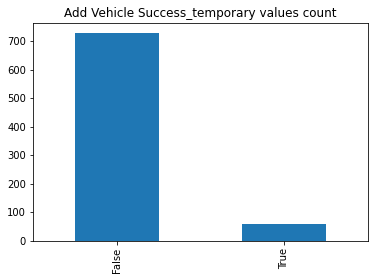

,occs_before_cancel,all_occs,occs_before_cancel/all_occs
True,28.0,59,0.474576
False,220.0,727,0.302613


In [111]:
table_comparision('Add Vehicle Success_temporary').sort_values('occs_before_cancel/all_occs', ascending=False)

PayPal users also tend to cancel subscription more often

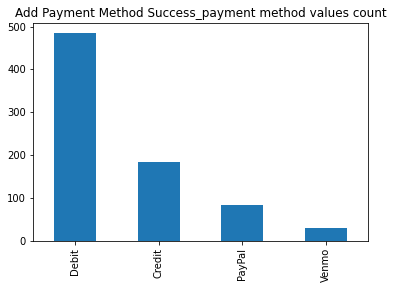

,occs_before_cancel,all_occs,occs_before_cancel/all_occs
PayPal,39.0,83,0.469880
Venmo,11.0,30,0.366667
Credit,61.0,183,0.333333
Debit,156.0,484,0.322314


In [112]:
table_comparision('Add Payment Method Success_payment method').sort_values('occs_before_cancel/all_occs', ascending=False)


Here we can see, that people who log in using Google or Email cancel subscription slightly more then those who use Apple and Facebook

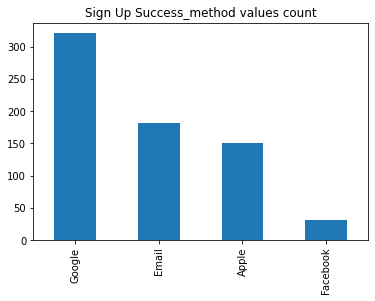

,occs_before_cancel,all_occs,occs_before_cancel/all_occs
Google,115.0,321,0.358255
Email,64.0,182,0.351648
Apple,47.0,150,0.313333
Facebook,10.0,32,0.312500


In [113]:
table_comparision('Sign Up Success_method').sort_values('occs_before_cancel/all_occs', ascending=False)

In the next table we can see, that people who come to support from a deeplink, menu or transaction details, tend to cancel their subscription much more then those who came from dashboard tab.

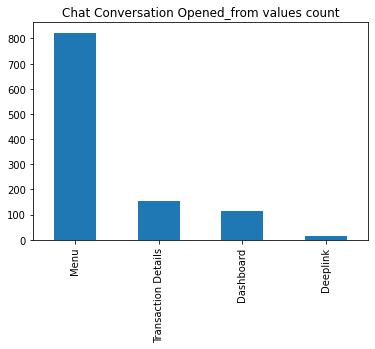

,occs_before_cancel,all_occs,occs_before_cancel/all_occs
Deeplink,14.0,16,0.875000
Menu,470.0,823,0.571081
Transaction Details,70.0,154,0.454545
Dashboard,22.0,112,0.196429


In [114]:
table_comparision('Chat Conversation Opened_from').sort_values('occs_before_cancel/all_occs', ascending=False)

Here we can see, that people who open chat conversation with transaction type OrderPayment tend to cancel subscription less then others.

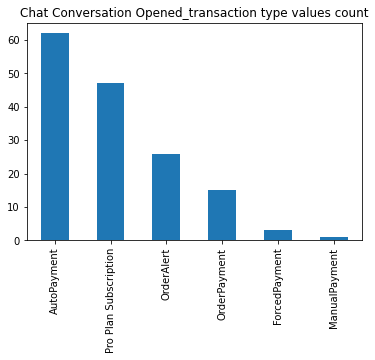

,occs_before_cancel,all_occs,occs_before_cancel/all_occs
Pro Plan Subscription,25.0,47,0.531915
OrderAlert,12.0,26,0.461538
AutoPayment,27.0,62,0.435484
OrderPayment,3.0,15,0.200000


In [115]:
table_comparision('Chat Conversation Opened_transaction type').sort_values('occs_before_cancel/all_occs', ascending=False)

In the next table we can see that people who have seen forced payment, pro plan subscription payment or auto payment in their transaction details, tend to cancel their subscription after a while.

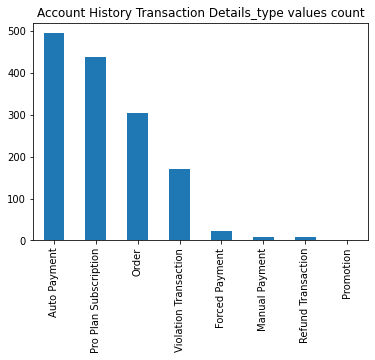

,score,occs_before_cancel,all_occs,score/occs_before_cancel,occs_before_cancel/all_occs,f1
Forced Payment,3.243687,11.0,23,0.294881,0.478261,0.364823
Pro Plan Subscription,26.434209,160.0,438,0.165214,0.365297,0.227524
Auto Payment,30.800700,208.0,494,0.148080,0.421053,0.219104
Other,0.808824,3.0,18,0.269608,0.166667,0.205993
Order,7.904943,55.0,303,0.143726,0.181518,0.160427
Violation Transaction,4.378641,39.0,171,0.112273,0.228070,0.150472


In [116]:
table_comparision('Account History Transaction Details_type', calc_score=True).sort_values('f1', ascending=False)

Here we can see, that when transaction is overdue, people naturaly visit transaction details tab, and they don't plan to cancel premium.

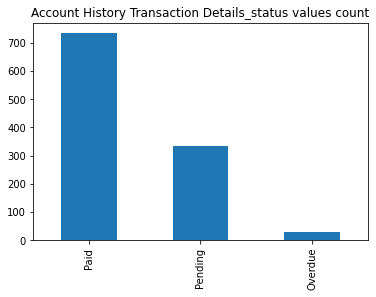

,occs_before_cancel,all_occs,occs_before_cancel/all_occs
Pending,108.0,335,0.322388
Paid,218.0,734,0.297003
Overdue,5.0,30,0.166667


In [117]:
table_comparision('Account History Transaction Details_status').sort_values('occs_before_cancel/all_occs', ascending=False)

We can see, that people mostly sign out automaticaly, but when they want to cancel the subscription perform it manualy.

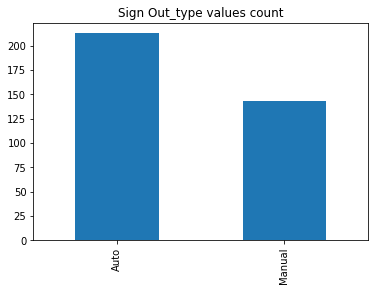

,score,occs_before_cancel,all_occs,score/occs_before_cancel,occs_before_cancel/all_occs,f1
Auto,0.050000,1.0,213,0.050000,0.004695,0.008584
Manual,20.076662,43.0,143,0.466899,0.300699,0.365806


In [118]:
table_comparision('Sign Out_type', calc_score=True)

Here we can see, that people who renew their subscription yearly, tend to cancel it more often. Significant part of people cancel subscription strictly after it's renew. But in general it is less frequently in comparision to people who didn't renew their subscription.

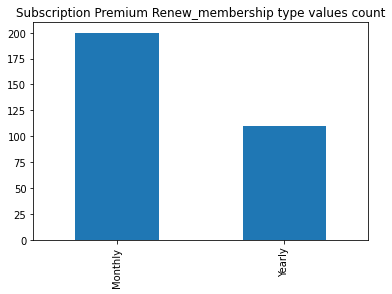

,score,occs_before_cancel,all_occs,score/occs_before_cancel,occs_before_cancel/all_occs,f1
Yearly,7.141226,25.0,110,0.285649,0.227273,0.253139
Monthly,5.015209,19.0,200,0.263958,0.095000,0.139716


In [119]:
table_comparision('Subscription Premium Renew_membership type', calc_score=True).sort_values('f1', ascending=False)

# User attributes correlation

Let's create dataset with only last information about every user. Also let's fill nans with text, because they also can represent some state of the user.

In [120]:
df_users = df_premium.groupby("userid").first()
df_users = df_users.fillna('NA')
df_users.head()

,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,Add Vehicle Success_make,Add Vehicle Success_model,Add Vehicle Success_color,Add Vehicle Success_year,...,Order_premium membership,Sign Up Error_method,Sign Up Error_description,Calculator Used_google map installed,Calculator Used_selected route type,Subscription Premium Renew_start date,Subscription Premium Renew_renewal date,Subscription Premium Renew_membership type,Add Vehicle Failed_error code,Add Vehicle Failed_error message
userid,,,,,,,,,,,,,,,,,,,,,
0006869712ec9841dc36234bce245203,MD,Add Payment Method Success,2022-01-19 18:47:45,android,samsung,SM-A716U,Chevrolet,Express 3500,White,2011.0,...,NA,NA,NA,NA,NA,2022-02-20,2023-02-20,Yearly,NA,NA
00596aa4edee32815aaf4aad659c484e,CA,Sign Up Success,2022-02-16 19:16:54,android,samsung,SM-N976U,Chrysler,300,Silver,2012.0,...,True,NA,NA,NA,NA,NA,NA,NA,NA,NA
007b54670d72df309afd87befcbb63db,CA,Sign Up Success,2022-04-05 20:52:23,ios,Apple,"iPhone13,4",Toyota,Highlander,White,2022.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0136a8eeca5d16ac1a521dd0e27ecec0,TX,Email Confirmation Success,2022-01-18 23:51:10,ios,Apple,"iPhone12,1",GMC,Sierra 2500HD,White,2006.0,...,NA,NA,NA,NA,NA,2022-02-19,2022-03-19,Monthly,NA,NA
01529f53aaba5b512168d432d5650556,IL,Sign Up Success,2022-03-17 05:04:50,android,motorola,moto g play (2021),Chevrolet,Silverado 1500,Blue,2004.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


After the subscription cancellation users' attributes get wiped out. So, we need to add user previous attribute before cancellation.

In [121]:
df_canceled_users = df_canceled.groupby("userid").last()
df_canceled_users = df_users.loc[df_canceled_users.index]
df_canceled_users.head()

,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,Add Vehicle Success_make,Add Vehicle Success_model,Add Vehicle Success_color,Add Vehicle Success_year,...,Order_premium membership,Sign Up Error_method,Sign Up Error_description,Calculator Used_google map installed,Calculator Used_selected route type,Subscription Premium Renew_start date,Subscription Premium Renew_renewal date,Subscription Premium Renew_membership type,Add Vehicle Failed_error code,Add Vehicle Failed_error message
userid,,,,,,,,,,,,,,,,,,,,,
03e0c91e1163e8b80e74e586a3e666d6,MD,Sign Up Success,2022-02-21 21:30:43,ios,Apple,"iPhone12,1",Chevrolet,Silverado,White,2014.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
051a5f8bce75a601be987980a09d4187,VA,Sign Up Success,2022-04-01 19:17:30,ios,Apple,"iPhone14,2",Ford,Focus SE,Red,2018.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
05630c0e889fe7371fc74d7ae01f491f,FL,Sign Up Success,2022-03-12 23:48:01,ios,Apple,"iPhone13,2",Chevrolet,Equinox,Silver,2019.0,...,True,NA,NA,NA,NA,NA,NA,NA,NA,NA
060153cf7a5844d9aed735d408b35f97,TX,Subscription Premium Renew,2022-02-11 01:15:32,outofband,Apple,"iPhone14,2",NA,NA,NA,NA,...,NA,NA,NA,NA,NA,2022-02-12,2023-02-12,Yearly,NA,NA
078ae59f1ae79df514e846e5e51eca8b,CA,Sign Up Success,2022-03-08 18:57:36,ios,Apple,"iPhone12,1",Honda,Accord,Silver,2005.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [122]:
def def_calculate_user_attribute_corellation(user_attribute_name, add_to_res=True):
  # Getting attributes value frequency
    value_freq = df_users[user_attribute_name].value_counts()
    # Defining boundary for adding key to "Other" category
    value_freq_min = max(len(df_users) / 100, MIN_OCCS_TO_ANALYZE)
    # Defining attributes values
    valid_keys = list(value_freq[value_freq >= value_freq_min].keys())
    if len(value_freq[value_freq >= value_freq_min]) < len(value_freq):
        valid_keys += ["Other"]
    # Creating dataframe
    df_scored_atts = pd.DataFrame(data={'occs_cancel': 0, 'all_occs': 0}, index=valid_keys)
    # Creating new result dataframe part if needed
    if add_to_res:
        df_multiindex_part = pd.DataFrame(data={'event_name': ['']*len(valid_keys), 
                                                'attribute_name':[user_attribute_name]*len(valid_keys), 
                                                'attribute_value':valid_keys})
        df_res_part = pd.DataFrame(data={'occs_cancel': 0, 'all_occs': 0}, index=pd.MultiIndex.from_frame(df_multiindex_part))
        df_res_part = df_res_part.sort_index()
    # Filling dataframes
    canceled_value_freq = df_canceled_users[user_attribute_name].value_counts()
    for attribute_val in value_freq.keys():
        cur_attribute_val = attribute_val
        if attribute_val not in valid_keys:
            cur_attribute_val = "Other"
        if attribute_val in canceled_value_freq:
            df_scored_atts.loc[cur_attribute_val, 'occs_cancel'] += canceled_value_freq[attribute_val]
        df_scored_atts.loc[cur_attribute_val, 'all_occs'] += value_freq[attribute_val]
        if add_to_res:
            if attribute_val in canceled_value_freq:
                df_res_part.loc[('', user_attribute_name, cur_attribute_val), 'occs_cancel'] += canceled_value_freq[attribute_val]
            df_res_part.loc[('', user_attribute_name, cur_attribute_val), 'all_occs'] += value_freq[attribute_val]
    # Dropping statistically inappropriate variants
    df_scored_atts = df_scored_atts.drop(df_scored_atts[df_scored_atts['all_occs'] < MIN_OCCS_TO_ANALYZE].index)
    # Creating target column
    df_scored_atts['occs_cancel/all_occs'] = df_scored_atts['occs_cancel'] / df_scored_atts['all_occs']
    # Adding res part dataframe to res
    if add_to_res:
        global df_res
        df_res = pd.concat([df_res, df_res_part])
        df_res = df_res.sort_index()
    return df_scored_atts.sort_values('occs_cancel/all_occs',ascending=False)

Here we can observe that IL or FL state users usually have a higher chance to cancel the subscription than TX or NY users. CA, NJ, VA and other states subscribers are in the middle.


In [123]:
def_calculate_user_attribute_corellation('user_state')

,occs_cancel,all_occs,occs_cancel/all_occs
IL,20,43,0.465116
FL,26,63,0.412698
Other,31,83,0.373494
VA,9,26,0.346154
NJ,6,18,0.333333
CA,112,339,0.330383
TX,44,189,0.232804
NY,3,33,0.090909


If user has outofband platform value, they probably have less chances to cancel the subscription.

In [124]:
def_calculate_user_attribute_corellation('event_platform')

,occs_cancel,all_occs,occs_cancel/all_occs
android,92,275,0.334545
ios,147,466,0.315451
outofband,12,53,0.226415


Different device manufacturers don't seem to be distinguished much in terms of correlation with the target. Only motorola users have a slightly lower chance to cancel the subsription, and unknown manufacturers have almost zero chance.

In [125]:
def_calculate_user_attribute_corellation('device_manufacture')

,occs_cancel,all_occs,occs_cancel/all_occs
samsung,72,197,0.365482
Other,9,25,0.360000
LGE,6,18,0.333333
Google,5,15,0.333333
Apple,152,483,0.314700
motorola,5,25,0.200000
NA,2,31,0.064516


Different devices have different chances to cancel the subscription but we can't actually observe any visible logic behind it. Only NAs (unknown models) corellate lowly with subscription cancel and this fact can be understood.

In [126]:
def_calculate_user_attribute_corellation('device_model')

,occs_cancel,all_occs,occs_cancel/all_occs
"iPhone13,1",8,16,0.500000
"iPhone14,2",9,21,0.428571
SM-G998U,7,17,0.411765
"iPhone11,8",14,36,0.388889
"iPhone13,3",11,29,0.379310
Other,105,296,0.354730
"iPhone12,1",24,68,0.352941
SM-G991U,5,15,0.333333
"iPhone12,5",14,44,0.318182
"iPhone12,8",5,18,0.277778


# Proposed new user attributes

We calculated other attributes based on that were in the given dataset. They can highlight some moments of user behavior and help identify users with a high probability of premium subscription cancellation.

In [127]:
dates = ['event_created_date', 'Subscription Premium_start date', 'Subscription Premium_renewal date',
         'Subscription Premium Renew_start date', 'Subscription Premium Renew_renewal date']

for col in dates:
  df_premium[col] = pd.to_datetime(df_premium[col], format='%Y-%m-%d')

df_all_canceled = df_premium[df_premium['userid'].isin(df_canceled['userid'])]

In [128]:
df_all_canceled

,userid,user_state,event_name,event_created_date,event_platform,device_manufacture,device_model,Add Vehicle Success_make,Add Vehicle Success_model,Add Vehicle Success_color,...,Order_premium membership,Sign Up Error_method,Sign Up Error_description,Calculator Used_google map installed,Calculator Used_selected route type,Subscription Premium Renew_start date,Subscription Premium Renew_renewal date,Subscription Premium Renew_membership type,Add Vehicle Failed_error code,Add Vehicle Failed_error message
1,66d1fab17f5b7bcf9e43ae0438a2a6cf,IL,Order,2022-01-15 11:17:12,outofband,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,66d1fab17f5b7bcf9e43ae0438a2a6cf,IL,Order,2022-01-15 11:17:12,outofband,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,66d1fab17f5b7bcf9e43ae0438a2a6cf,IL,Order,2022-01-15 11:17:12,outofband,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,66d1fab17f5b7bcf9e43ae0438a2a6cf,IL,Order,2022-01-15 11:17:12,outofband,NaN,NaN,NaN,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
8,be4d8d331b7217e284c9736c58508e9a,CA,Order,2022-01-15 15:17:23,outofband,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14665,387c88f25e204376acf003420663fef5,AR,Subscription Premium Cancel,2022-04-16 18:57:36,outofband,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
14669,387c88f25e204376acf003420663fef5,AR,Wallet Opened,2022-04-16 19:03:49,android,samsung,SM-G970U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
14670,387c88f25e204376acf003420663fef5,AR,Chat Conversation Opened,2022-04-16 19:06:33,android,samsung,SM-G970U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
14680,36e396c36c0c652d06dee2f85acb11c9,NJ,Chat Conversation Opened,2022-04-16 20:22:58,ios,Apple,"iPhone9,1",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [129]:
def days_to_cancel(event, df_all):
  if event == 'Subscribe or Renew':
    df_days = df_all[['userid', 'Subscription Premium_start date', 'Subscription Premium_renewal date',
                      'Subscription Premium Renew_start date', 'Subscription Premium Renew_renewal date']
                     ].groupby('userid').first()

    tmp = df_all.loc[(df_all['event_name'] == 'Subscription Premium Cancel'),
                     ['userid', 'event_created_date']
                     ].groupby('userid').first()

    df_days = df_days.join(tmp)

    nat_mask = (df_days['Subscription Premium_renewal date'].isnull())
    df_days['event'] = np.where(nat_mask, df_days['Subscription Premium Renew_renewal date'], df_days['Subscription Premium_renewal date'])
    df_days['days_to_event'] = (df_days['event'] - df_days['event_created_date']).dt.days

    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax[0].hist(df_days.loc[df_days['days_to_event'] < 300, 'days_to_event'], bins=65)
    ax[0].set_xlabel('days to renew')
    ax[0].set_ylabel('count')
    ax[0].set_title(event)
    ax[1].hist(df_days.loc[df_days['days_to_event'] >= 300, 'days_to_event'], bins=50)
    ax[1].set_xlabel('days to renew')
    ax[1].set_ylabel('count')
    ax[1].set_title(event)

    plt.show()

  else:
    df_days = df_all.loc[df_all['event_name'] == event,
                         ['userid', 'event_created_date']
                         ].groupby('userid').first()

    tmp = df_all.loc[(df_all['event_name'] == 'Subscription Premium Cancel'),
                     ['userid', 'event_created_date']
                     ].groupby('userid').first()

    df_days = df_days.join(tmp, rsuffix='_cancel')
    
    df_days['days_to_event'] = (df_days['event_created_date_cancel'] - df_days['event_created_date']).dt.days

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.hist(df_days['days_to_event'], bins=65)
    ax.set_xlabel('days to cancel')
    ax.set_ylabel('count')
    ax.set_title(event)

    plt.show()

In these graphs, we can see the number of days from the subscription cancelletion to renewal date. According to them, users most often cancel the subscription on the day of its renewal or a few days after the start of the subscription (27-30 days for a monthly subscription). We also have a small number of cases where the user canceled the yearly subscription a couple of days after it started. Usually, this happens when the subscription is automatically renewed.

You can see negative values in the graph. They mean that the subscription was canceled after its expiration date. We assume that the automatic renewal did not happened due to insufficient funds in the account, etc.

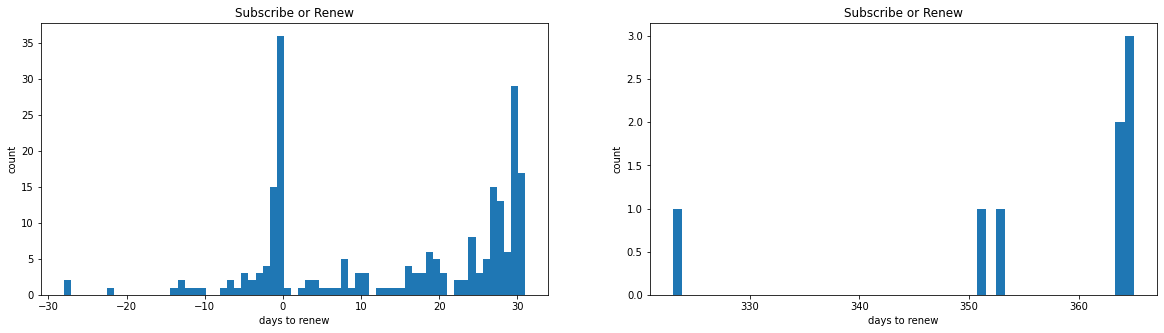

In [130]:
days_to_cancel('Subscribe or Renew', df_all_canceled)

The following graphs are interpreted differently. This is the number of days from the nearest event of some type until unsubscription. Positive values mean that the event occurred before cancelletion, and negative values - after.

For example, Chat Conversation Opened most often happens either on the day of unsubscription or the next day. A similar relationship exists in Chat Conversation Started.

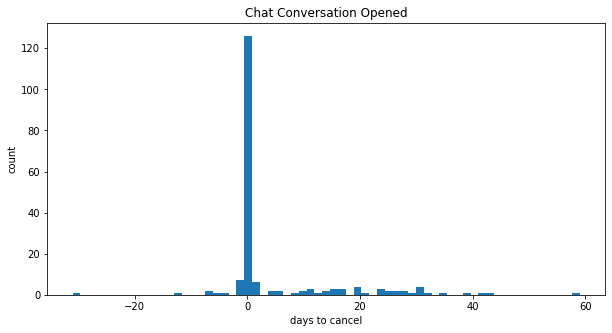

In [131]:
days_to_cancel('Chat Conversation Opened', df_all_canceled)

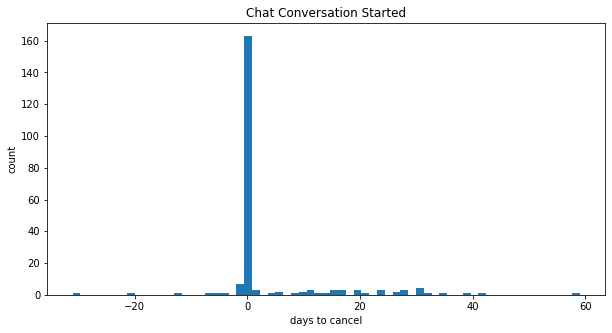

In [132]:
days_to_cancel('Chat Conversation Started', df_all_canceled)

Interestingly, users most often add a vehicle on the day of unsubscription. It can be assumed that they simply test the functionality and leave, because they did not intend to stay, or remain dissatisfied. Often they add a car at the beginning of a monthly subscription and unsubscribe after it ends.

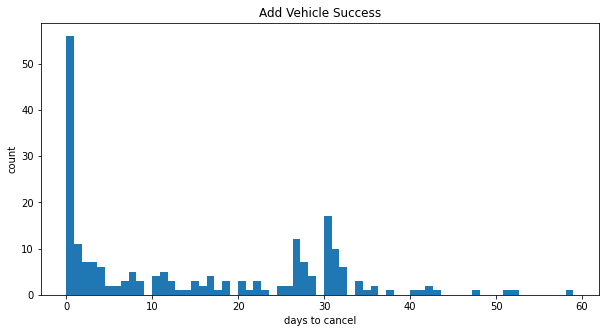

In [133]:
days_to_cancel('Add Vehicle Success', df_all_canceled)

From the following graph, it can be concluded that a part of users makes the last order on the day of cancellation. About the same number stop using the app earlier or continue to use it.

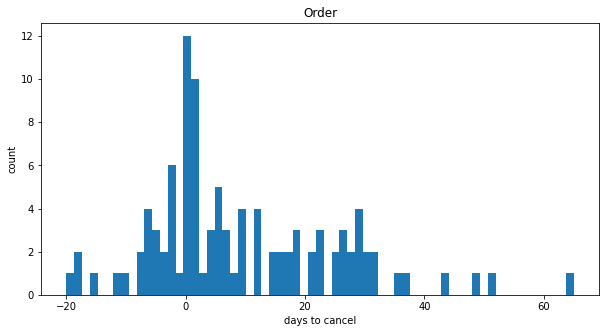

In [134]:
days_to_cancel('Order', df_all_canceled)

We decided to evaluate user activity by the number of orders they make. The following graph demonstrates the number of orders while using the premium subscription. The average number of orders for users who did not cancel is 7.87, and for those who canceled - 2.56. So, these users are significantly different in terms of their activity.

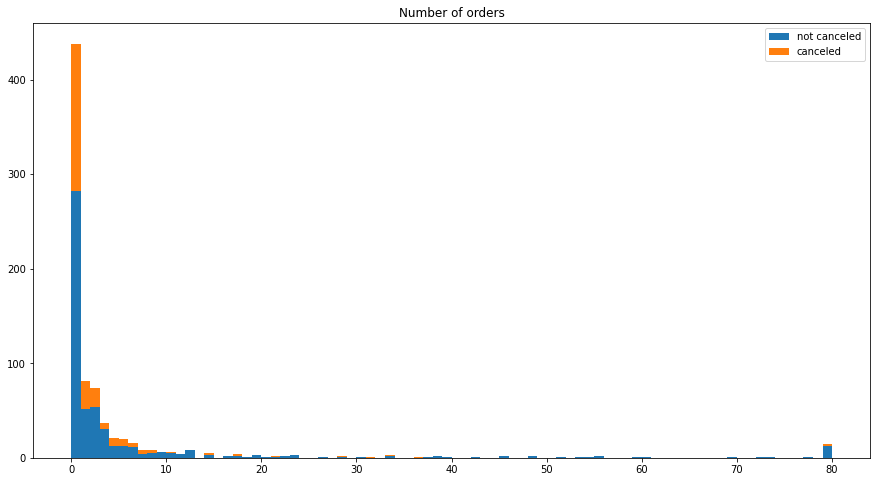

In [142]:
df_orders = df_premium.loc[(df_premium['event_name'] == 'Order') &
                           (df_premium['Order_premium membership'] == True), 
                                  ['userid', 'event_name']
                                  ].groupby('userid').count().reset_index()

tmp = pd.DataFrame({'userid':df_premium.loc[~df_premium['userid'].isin(df_orders['userid']), 'userid'].unique(), 'event_name':0})
df_orders = pd.concat([df_orders, tmp], ignore_index=True)

df_orders['canceled'] = df_orders['userid'].isin(df_canceled['userid'])
plt.figure(figsize=(15, 8));
plt.hist([df_orders.loc[df_orders['canceled'] == False, 'event_name'].clip(0, 80),
          df_orders.loc[df_orders['canceled'] == True, 'event_name'].clip(0, 80)],
          bins=80, stacked=True);
plt.title('Number of orders');
plt.legend(['not canceled', 'canceled']);

plt.show();

In [136]:
df_orders.groupby('canceled')['event_name'].sum() / df_orders['canceled'].value_counts()

canceled
False    7.872928
True     2.561753
dtype: float64

The metrics listed in this section demonstrate some details of user behavior and can help to determine how likely a user is to unsubscribe. But since they cannot be evaluated by correlation like all other events and attributes, we do not include them in the final list.

# Resulting list

In [137]:
# Deleting events with occurences less then bound MIN_OCCS_TO_ANALYZE
df_res = df_res.drop(df_res[df_res['all_occs'] < MIN_OCCS_TO_ANALYZE].index)
# Creating div column
df_res['occs_cancel/all_occs'] = df_res['occs_cancel'] / df_res['all_occs']

Now we will compare occs_cancel/all_occs for all event-attribute-value tuples with its value for Subscription Premium, and normalize it to [-1, 1]. It means, that if something is made more often by subscription cancellators, then their part, it corelates with cancellation event. If it is done much less often, it negatevily corelates with it. And if it is done with equal frequency, events or attributes are independent/

In [138]:
correlation_zero = df_res.loc[('Subscription Premium', '', ''), 'occs_cancel/all_occs'].values[0]
df_res['pseudocorrelation'] = (df_res['occs_cancel/all_occs'] - correlation_zero) / max(1 - correlation_zero, correlation_zero)

Let's watch for the full table. It is useful for specific events/attributes search

In [139]:
df_res

occs_cancel  \
event_name                          attribute_name     attribute_value                      
                                    device_manufacture Apple                          152   
                                                       Google                           5   
                                                       LGE                              6   
                                                       NA                               2   
                                                       Other                            9   
                                                       motorola                         5   
                                                       samsung                         72   
                                    device_model       NA                               2   
                                                       Other                          105   
                                                       SM-G991U                         5   
                                                       SM-G998U                         7   
                                                       iPhone11,6                       2   
                                                       iPhone11,8                      14   
                                                       iPhone12,1                      24   
                                                       iPhone12,3                       3   
                                                       iPhone12,5                      14   
                                                       iPhone12,8                       5   
                                                       iPhone13,1                       8   
                                                       iPhone13,2                       9   
                                                       iPhone13,3                      11   
                                                       iPhone13,4                      14   
                                                       iPhone14,2                       9   
                                                       iPhone14,3                      12   
                                                       iPhone14,5                       7   
                                    event_platform     android                         92   
                                                       ios                            147   
                                                       outofband                       12   
                                    user_state         CA                             112   
                                                       FL                              26   
                                                       IL                              20   
                                                       NJ                               6   
                                                       NY                               3   
                                                       Other                           31   
                                                       TX                              44   
                                                       VA                               9   
Account History Transaction Details                                                   476   
                                    status             Overdue                          5   
                                                       Paid                           218   
                                                       Pending                        108   
                                    type               Auto Payment                   208   
                                                       Forced Payment                  11   
                                                       Order                   

Now let's make a 'rating' of events and their attributes

In [140]:
df_res.sort_values('pseudocorrelation', ascending=False)

occs_cancel  \
event_name                          attribute_name     attribute_value                      
Chat Conversation Opened            from               Deeplink                        14   
Add Vehicle Success                 color              Other                           11   
                                                       Other                           11   
Chat Conversation Started                                                             552   
Chat Conversation Opened            from               Menu                           470   
                                    transaction type   Pro Plan Subscription           25   
Account Setup Skip                                                                     10   
Account Setup Profile Skip                                                             58   
Chat Conversation Opened                                                              581   
                                    device_model       iPhone13,1                       8   
Account History Transaction Details type               Forced Payment                  11   
Add Vehicle Success                 temporary          True                            28   
Add Payment Method Success          payment method     PayPal                          39   
                                    user_state         IL                              20   
Chat Conversation Opened            transaction type   OrderAlert                      12   
                                    from               Transaction Details             70   
                                    transaction type   AutoPayment                     27   
                                    device_model       iPhone14,2                       9   
Add Vehicle Success                 make               Jeep                            14   
Account History Transaction Details type               Auto Payment                   208   
                                    user_state         FL                              26   
                                    device_model       SM-G998U                         7   
Add Vehicle Success                 make               Kia                             11   
                                                       Chrysler                         4   
                                    device_model       iPhone11,8                      14   
Wallet Opened                                                                         445   
                                    device_model       iPhone13,3                      11   
Add Vehicle Success                 make               Honda                           35   
                                    user_state         Other                           31   
Add Payment Method Success          payment method     Venmo                           11   
                                    device_manufacture samsung                         72   
Account History Transaction Details type               Pro Plan Subscription          160   
                                    device_manufacture Other                            9   
Sign Up Success                     method             Google                         115   
Add Vehicle Success                 make               Subaru                           5   
                                    device_model       Other                          105   
Add Vehicle Success                 make               Ford                            28   
                                    device_model       iPhone12,1                      24   
Sign Up Success                     method             Email                           64   
Add Vehicle Break                                                                      54   
                                    user_state         VA                               9   
Email Confirmation Success                                                     

# Conclusion

We have identified the events and attributes that have the highest and lowest correlation with the potential account cancellation. Additionally, we have explored some additional metrics that may indicate unsubscribing users.

The final result is presented in the section Resulting list. Since the correlation can vary significantly depending on the attributes, the events are broken down into subsections consisting of the attribute's keys and values.

In general, most often before cancellation of the subscription, users open and start communication with technical support (via Deeplink or the menu about Pro Plan Subscription) and skip account or profile settings. Somewhat surprisingly, successfully adding a vehicle of an underrepresented and rare color also has a high correlation. Users are least likely to sign out of the app automaticaly, use a device of unknown manufacturer or model, cancel their subscription one more time, be in NY state or renew their subscription before cancellation.